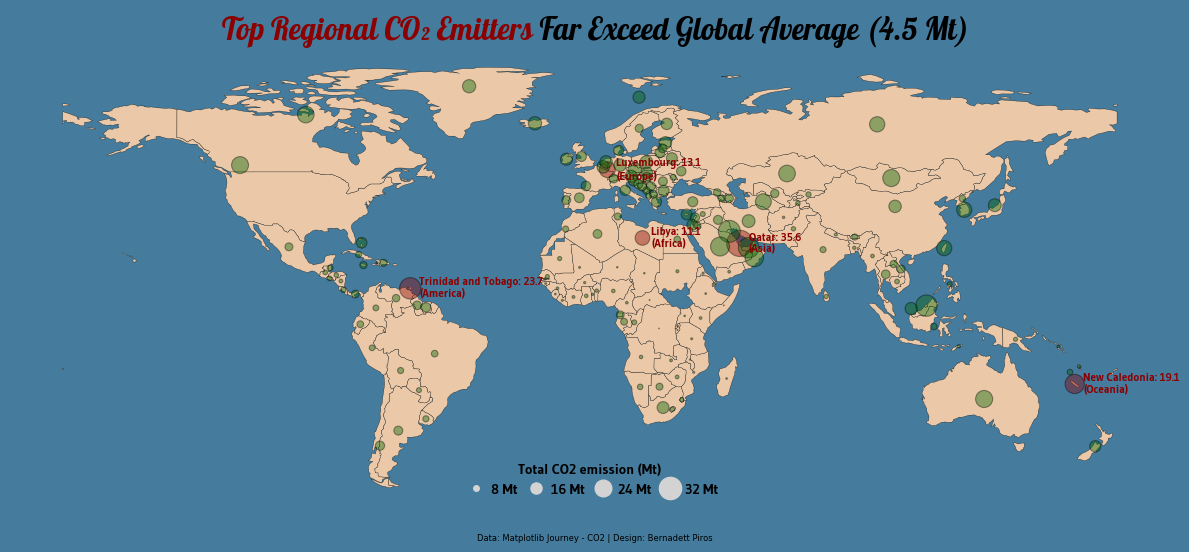

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
from pyfonts import load_font
from highlight_text import fig_text, ax_text
import matplotlib.lines as mlines

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/world/world.geojson"
world = gpd.read_file(url)
world = world[world["name"] != "Antarctica"]
world["continent"] = world["continent"].replace("North America", "America")
world["continent"] = world["continent"].replace("South America", "America")

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/CO2/CO2.csv"
df = pd.read_csv(url)

world = world.merge(
  df,
  left_on="code_adm",
  right_on="ISO",
)
world = world.sort_values(["Total"], ascending=False)

idx_max = world.groupby("continent")["Total"].idxmax()

avg_total = world["Total"].mean()

lobster = load_font(
    font_url = "https://github.com/google/fonts/blob/main/ofl/lobster/Lobster-Regular.ttf?raw=true"
)

gudea = load_font(
    font_url = "https://github.com/google/fonts/blob/main/ofl/gudea/Gudea-Bold.ttf?raw=true"
)

projection = ccrs.PlateCarree()
world = world.to_crs("EPSG:4326")  
world_projected = world.to_crs("EPSG:3857")  
world_projected["centroid"] = world_projected["geometry"].centroid


world["centroid"] = world_projected["centroid"].to_crs("EPSG:4326")  
x = world["centroid"].x
y = world["centroid"].y
s = world["Total"]*10

text_labels = world.loc[idx_max, ["continent", "name", "Total", "centroid"]].reset_index(drop=True)

names = text_labels["name"].unique()

fig, ax = plt.subplots(figsize=(12, 7.5), layout="tight") 

world.plot(ax=ax, color="#EBC9A8", ec="black", lw=0.2)

colors = np.where(world["name"].isin(names), "darkred", "darkgreen")

scatter = ax.scatter(x, y, s=s, color=colors, label="Total", ec="black", lw=0.8, alpha=0.4)

legend_sizes = [8, 16, 24, 32]  
legend_labels = ["8 Mt", "16 Mt", "24 Mt", "32 Mt"]

handles = [
    mlines.Line2D([], [], marker="o", linestyle="None", markersize=size / 2, color="lightgrey")
    for size in legend_sizes
]

legend = ax.legend(handles,
          legend_labels,
          framealpha=0,
          loc="lower center",
          title="Total CO2 emission (Mt)",
          title_fontproperties=gudea,          
          labelcolor="black",
          #edgecolor="white",
          prop=gudea,    
          fontsize=6,          
          columnspacing=0.3,
          handletextpad=0.1,
          ncols=4)

for i, row in text_labels.iterrows():
    x = row["centroid"].x
    y = row["centroid"].y
    country = row["name"]
    value = row["Total"]  
    continent = row["continent"]
    ax.text(
        x=x+3,
        y=y,
        s=f"{country}: {value:.1f}\n({continent})",
        font=gudea,
        fontsize=8,
        color="darkred",        
        ha='left',
        va='center'
    )

fig_text(x=0.5,
         y=0.85,
         s=f"<Top Regional CO₂ Emitters> Far Exceed Global Average ({avg_total:.1f} Mt)",
         font=lobster,
         size=22,
         ha="center",
         highlight_textprops=[
             {"color": "darkred"}])        

fig.text(0.5, 0.15, "Data: Matplotlib Journey - CO2 | Design: Bernadett Piros",
         size=6, ha="center")
     
ax.set_facecolor("#457B9D")
fig.set_facecolor("#457B9D")

ax.axis("off")

plt.show()

#plt.savefig("bubble_map_CO2", dpi=300, bbox_inches='tight', pad_inches=0.2)
#plt.savefig("bubble_map_CO2",bbox_inches='tight', pad_inches=0.2)